# NLP Assignment            

# Name: Khuram Shahzad (21p-8742)

# 1.  Write code for computing Levenshtein Distance (Edit distance)

In [6]:
def EdithDistance(source, target):
    source= "#"+source
    target= "#"+target
    n= len(source)
    m= len(target)
    rows, cols = (n+1, m+1)
    arr = [[0 for i in range(cols)] for j in range(rows)]
    c=2
    arr[0][0]= "*"    

    #     Row Intialization

    for i in range(rows-1):
        arr[i+1][0]= source[i]
    for i in range(cols-1):
        arr[0][i+1]= target[i]


    for i in range(rows-c):
        i=i+c
        arr[i][c-1]= arr[i-1][c-1]+1

#     Cols Intialization
    for i in range(cols-c):
        i=i+c
        arr[c-1][i]= arr[c-1][i-1]+1
    a=0;
    for i in range(rows-c):
        i=i+c;
        for j in range(cols-c):
                j=j+c;
                if (arr[i][0]!=arr[0][j]):
                    a= arr[i-1][j-1]+2;
                    arr[i][j]= min(arr[i-1][j]+1, a, arr[i][j-1]+1)
                else:
                    arr[i][j]=  arr[i-1][j-1]##min(arr[i-1][j]+1,arr[i-1][j-1], arr[i][j-1]+1)         
#     for row in arr:
#         print(row)
    return arr[n][m]

Testing it:

In [5]:
EdithDistance("drive", "brief")

['*', '#', 'b', 'r', 'i', 'e', 'f']
['#', 0, 1, 2, 3, 4, 5]
['d', 1, 2, 3, 4, 5, 6]
['r', 2, 3, 2, 3, 4, 5]
['i', 3, 4, 3, 2, 3, 4]
['v', 4, 5, 4, 3, 4, 5]
['e', 5, 6, 5, 4, 3, 4]


4

# 2. Write a Calling code that is able to call the Distance metric multiple times (i.e for each pair of cities.

Average Function:

In [7]:
def Average(lst):
    return sum(lst) / len(lst)

In [8]:
def camel_to_Sentence_Case(a):
    temp = a[0].upper()
    for i in a[1:]:
        if i.isupper():
            temp+= ' '+i
        else:
            temp+=i
    
    return temp

Files Names List

In [9]:
fileNamesTraget=['bannu.txt', 'harnai.txt','kabul.txt','kandahar.txt'
          ,'maidanshahr.txt','marwat.txt','miramshah.txt','peshawar.txt'
          ,'tanai.txt','tirah.txt','urdu.txt','quetta.txt',]

Preperaring the Dataframe

In [12]:
import pandas as pd
heading=[]
numbering=[]
for i in range(len(fileNamesTraget)):
    heading.append(fileNamesTraget[i][:-4])
    numbering.append(i+1)
size= len(fileNamesTraget)
result=[]
final_result = [[0 for i in range(size)] for j in range(size)]
df = pd.DataFrame(final_result, index =numbering,columns =list(reversed(heading)))
df["names"] = heading
df.head()

,quetta,urdu,tirah,tanai,peshawar,miramshah,marwat,maidanshahr,kandahar,kabul,harnai,bannu,names
1,0,0,0,0,0,0,0,0,0,0,0,0,bannu
2,0,0,0,0,0,0,0,0,0,0,0,0,harnai
3,0,0,0,0,0,0,0,0,0,0,0,0,kabul
4,0,0,0,0,0,0,0,0,0,0,0,0,kandahar
5,0,0,0,0,0,0,0,0,0,0,0,0,maidanshahr


In [14]:
List1= []
List2= []
size= len(fileNamesTraget)
result=[]
final_result1 = [[0 for i in range(size)] for j in range(size)]
final_result2 = [[0 for i in range(size)] for j in range(size)]

for i in  range(size):
    List1.clear()
    with open(fileNamesTraget[i], 'r', encoding='UTF-8') as file:
        while (line := file.readline().rstrip()):
            List1.append(line)
    for j in  range(size):
        List2.clear()
        with open(fileNamesTraget[j], 'r', encoding='UTF-8') as file:
            while (line := file.readline().rstrip()):
                List2.append(line)
        result= []
        y=2;
        for t in  range(len(List1)):
            if (t+y<24):
                z= EdithDistance(List1[t+2],List2[t+2])
                max1= (len(List1[t+2])+ len(List2[t+2]))
                result.append(round(((max1-z)/max1)*100, 3))
        col= fileNamesTraget[j][:-4]
        df[col].iloc[i]=round(Average(result), 3)

Edit Distance (A table showing the average scores)

In [15]:
df

,quetta,urdu,tirah,tanai,peshawar,miramshah,marwat,maidanshahr,kandahar,kabul,harnai,bannu,names
1,48.988,19.090,71.197,78.969,42.175,91.037,53.482,39.916,41.294,42.520,32.253,100.000,bannu
2,52.024,29.812,36.347,31.673,40.370,31.005,39.952,45.480,47.093,44.888,100.000,32.253,harnai
3,83.303,33.405,58.187,55.389,86.662,46.103,60.907,81.570,81.284,100.000,44.888,42.520,kabul
4,89.886,35.244,48.938,47.919,71.927,44.788,67.461,88.640,100.000,81.284,47.093,41.294,kandahar
5,84.497,35.351,53.606,52.260,70.032,43.586,63.796,100.000,88.640,81.570,45.480,39.916,maidanshahr
6,71.200,31.639,52.630,47.367,60.309,54.148,100.000,63.796,67.461,60.907,39.952,53.482,marwat
7,52.483,20.800,71.810,84.766,42.400,100.000,54.148,43.586,44.788,46.103,31.005,91.037,miramshah
8,73.996,31.059,55.300,49.370,100.000,42.400,60.309,70.032,71.927,86.662,40.370,42.175,peshawar
9,46.607,23.629,80.424,100.000,49.370,84.766,47.367,52.260,47.919,55.389,31.673,78.969,tanai
10,50.859,22.527,100.000,80.424,55.300,71.810,52.630,53.606,48.938,58.187,36.347,71.197,tirah


# 3. Bonus

A plot (similar to one shown in slide 24) showing the edit distance as a line between  cities.

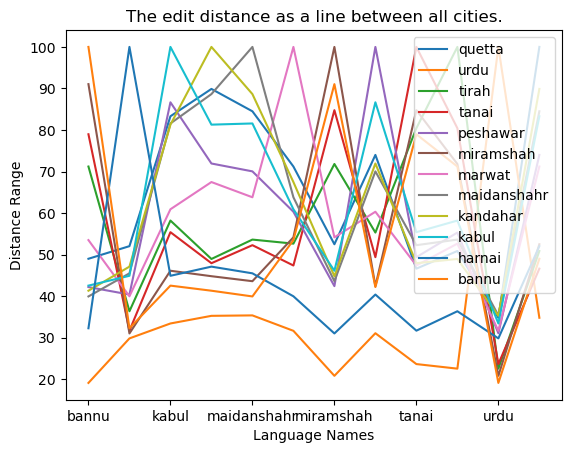

In [16]:

from matplotlib import pyplot as plt

df.set_index('names').plot(kind = 'line')
plt.title("The edit distance as a line between all cities.")
plt.xlabel("Language Names")
plt.ylabel("Distance Range")
plt.rcParams["figure.figsize"] = (15,6)
plt.show()

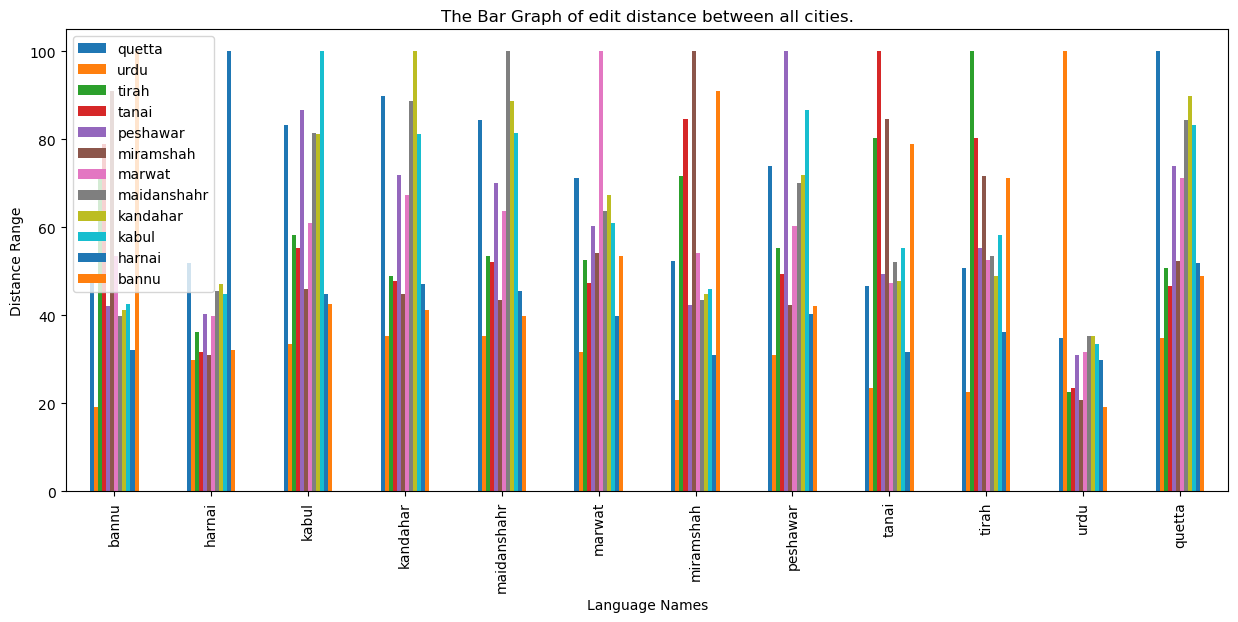

In [17]:
from matplotlib import pyplot as plt

df.set_index('names').plot(kind = 'bar')
plt.title("The Bar Graph of edit distance between all cities.")
plt.xlabel("Language Names")
plt.ylabel("Distance Range")
plt.rcParams["figure.figsize"] = (30,6)
plt.show()
# df.head()